# Вариант 30
#### Набор данных: 
##### 6 (occupancy)
#### Классификаторы: 
##### 3 – линейный классификатор (персептрон);
##### 4 – логический классификатор (бинарное решающее дерево). 
#### Задание:
##### 1.Изучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных (включить полученные описания в отчёт).
##### 2.Удалите дубликаты строк в наборе данных; приведите размер набора данных до и после данной операции;
##### 3.Оцените сбалансированность данных по классам (постройте гистограмму). Используйте полученную информацию при выборе метрики оценки качества классификации (PR или ROC кривая)
##### 4.Выполните масштабирование количественных признаков; Постройте диаграммы BoxPlot для признаков до и после масштабирования. Выберите способ масштабирования (например, нормализацию или стандартизацию);
##### 5.Выполните замену категориальных признаков; выберите и обоснуйте способ замены;
##### 6.Оцените корреляцию между признаков и удалите те признаки, которые коррелируют с наибольшим числом других (удалять признаки нужно только для линейных методов классификации);
##### 7.Заполните пропущенные значения в данных;
##### 8.Решите поставленную задачу классификации в соответствии с заданием. При подборе параметров классификатора используйте метод GridSearchCV и перекрёстную проверку (изучите возможные для изменения параметры классификации). Оцените качество работы классификатора. 



### 1.Изучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn as skl
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Perceptron
from sklearn.calibration import CalibratedClassifierCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_recall_curve, average_precision_score, roc_curve, auc
import warnings
warnings.simplefilter('ignore')
%matplotlib inline

oc = pd.read_csv('datatraining.txt')
occ = pd.DataFrame(oc)
occ.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1
2,2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,1
3,2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,0.004779,1
4,2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,0.004772,1
5,2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,0.004757,1


#### Атрибуты:
##### 1.Дата (год-месяц-день) и время (час-минута-секунда)
##### 2.Температура, в градусах Цельсия
##### 3.Относительная влажность, %
##### 4.Свет, в люксах
##### 5.CO2, в ppm (1ppm= 1мг/кг)
##### 6.Удельная влажность, в кг воды-пара/кг воздуха
##### 7.Заполняемость, 0 или 1, 0 для незанятого, 1 для занятого статуса

### 2.Удалите дубликаты строк в наборе данных; приведите размер набора данных до и после данной операции

In [4]:
docc = occ.drop_duplicates()
docc.count()
print ('До удаления дубликатов:', occ.shape)
print ('После удаления дубликатов:', docc.shape)

До удаления дубликатов: (8143, 7)
После удаления дубликатов: (8143, 7)


### 3.Оцените сбалансированность данных по классам (постройте гистограмму)

<AxesSubplot:xlabel='Occupancy', ylabel='count'>

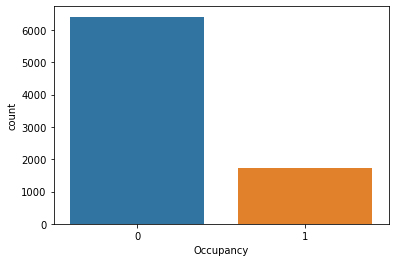

In [5]:
import seaborn as sns
sns.countplot(data=docc, x='Occupancy')

### 4.Выполните масштабирование количественных признаков; Постройте диаграммы BoxPlot для признаков до и после масштабирования

<AxesSubplot:>

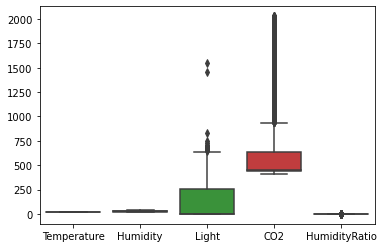

In [6]:
sns.boxplot(data = occ[['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio']])

<AxesSubplot:>

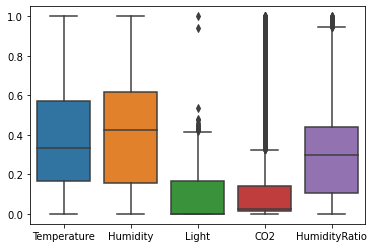

In [7]:
scaler = preprocessing.MinMaxScaler()
occ[['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio']] = scaler.fit_transform(occ[['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio']].values.astype(float))
sns.boxplot(data=occ[['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio']])

### 5.Выполните замену категориальных признаков

In [8]:
occ['date'].describe()

count                    8143
unique                   8143
top       2015-02-07 03:00:00
freq                        1
Name: date, dtype: object

### 6.Оцените корреляцию между признаков и удалите те признаки, которые коррелируют с наибольшим числом других

<AxesSubplot:>

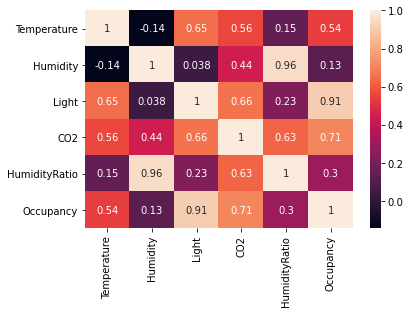

In [9]:
Corrocc = occ.corr()
sns.heatmap(Corrocc, annot = True)

### 7.Заполните пропущенные значения в данных

In [10]:
nullocc = occ.isnull()
nullocc.sum()

date             0
Temperature      0
Humidity         0
Light            0
CO2              0
HumidityRatio    0
Occupancy        0
dtype: int64

### 8.Решите поставленную задачу классификации в соответствии с заданием. При подборе параметров классификатора используйте метод GridSearchCV и перекрёстную проверку. Оцените качество работы классификатора. 

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score
X = occ.drop(('date'), axis=1)
Y = occ.Occupancy
X.columns

Index(['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio',
       'Occupancy'],
      dtype='object')

In [25]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 1)

#####  Линейный классификатор (персептрон)

In [44]:
ppn = Perceptron(max_iter=500, eta0 =1, penalty='l2', random_state = 1)
ppn.fit(x_train, y_train)
ppn_predict = ppn.predict(x_test)
print('Оценка точности: %.5f' % accuracy_score(y_test, ppn_predict))

Оценка точности: 1.00000


######  Метод GridSearchCV

In [45]:
ppn1 = {'max_iter': range(500,2000,50), 'penalty': ('l2', 'l1', 'elasticnet')}
ppn2 = GridSearchCV(ppn, ppn1, cv=5, n_jobs=-1, verbose=True)
ppn2.fit(x_train, y_train)
print('Лучший набор:', ppn2.best_params_)
print('Лучшая точность:', ppn2.best_score_)
print('Значение точности: %.5f' % accuracy_score(y_test, ppn_predict))

Fitting 5 folds for each of 90 candidates, totalling 450 fits
Лучший набор: {'max_iter': 500, 'penalty': 'l1'}
Лучшая точность: 1.0
Значение точности: 1.00000


######  Перекрестный метод

In [46]:
all_accuracies = cross_val_score(estimator=ppn, X=x_train, y=y_train, cv=5)
print('Точность для cv=5:', all_accuracies)
print('Среднее значение точности:', all_accuracies.mean())

Точность для cv=5: [1.         0.99385965 1.         1.         1.        ]
Среднее значение точности: 0.9987719298245615


##### Логический классификатор (бинарное решающее дерево)

In [39]:
tree = DecisionTreeClassifier(criterion = 'gini', max_depth = 5, max_features = 5, random_state = 1)
tree.fit(x_train, y_train)
y_pred = tree.predict(x_test)
print('Оценка точности: %.5f' % accuracy_score(y_test, y_pred))

Accuracy ppn: 1.00000


###### Метод GridSearchCV

In [48]:
tree1 = {'max_depth': range(1,11), 'max_features': range(4,19), 'criterion': ('gini', 'entropy')}
tree2 = GridSearchCV(tree, tree1, cv=5, n_jobs=-1, verbose=True)
tree2.fit(x_train, y_train)
print('Лучший набор:', tree2.best_params_)
print('Лучшая точность:', tree2.best_score_)
print('Значение точности: %.5f' % accuracy_score(y_test, y_pred))

Fitting 5 folds for each of 300 candidates, totalling 1500 fits
Лучший набор: {'criterion': 'gini', 'max_depth': 1, 'max_features': 6}
Лучшая точность: 1.0
Значение точности: 1.00000


###### Перекрестный метод

In [49]:
all_accuracies = cross_val_score(estimator=tree, X=x_train, y=y_train, cv=5)
print('Точность для cv=5:', all_accuracies)
print('Среднее значение точности:', all_accuracies.mean())

Точность для cv=5: [0.99912281 1.         1.         1.         1.        ]
Среднее значение точности: 0.9998245614035088
